In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

1. 얼굴 질병 예측 모델

In [7]:
from pathlib import Path
train_dir = Path(r'E:\main\train')
test_dir = Path(r'E:\main\testing')


In [8]:
Acne = list(train_dir.glob('Acne/*'))
Actinic = list(train_dir.glob('Actinic Keratosis/*'))
Basal = list(train_dir.glob('Basal Cell Carcinoma/*'))
Eczemaa = list(train_dir.glob('Eczemaa/*'))
Rosacea = list(train_dir.glob('Rosacea/*'))


In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 440 files belonging to 5 classes.
Found 185 files belonging to 5 classes.


In [11]:
class_names = train_ds.class_names

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9542505


In [14]:
num_classes = len(class_names)

facemodel = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\mash0\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
facemodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs=15
history = facemodel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 580ms/step - accuracy: 0.1902 - loss: 1.9542 - val_accuracy: 0.2000 - val_loss: 1.6061
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 475ms/step - accuracy: 0.2511 - loss: 1.5786 - val_accuracy: 0.3135 - val_loss: 1.4931
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.3607 - loss: 1.4231 - val_accuracy: 0.3351 - val_loss: 1.4354
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 459ms/step - accuracy: 0.4481 - loss: 1.2658 - val_accuracy: 0.3892 - val_loss: 1.3805
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5487 - loss: 1.1517 - val_accuracy: 0.4541 - val_loss: 1.4264
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.5865 - loss: 1.0313 - val_accuracy: 0.5514 - val_loss: 1.2907
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 0.6815 - loss: 0.8460 - val_accuracy: 0.5189 - val_loss: 1.3384
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.7654 - loss: 0.6585 - val_accuracy: 0

In [34]:
test2_url = u"file:///E:/test3.jpg"
test2_path = tf.keras.utils.get_file('tegsgrggt4', origin=test2_url)

img = tf.keras.utils.load_img(
    test2_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = facemodel.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

3456/3456 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
This image most likely belongs to Eczemaa with a 73.69 percent confidence.


2. 여드름 심각도 측정 모델

In [20]:
from pathlib import Path
data_dir = Path(r'D:\Created Dataset')

In [21]:
Level_0 = list(data_dir.glob('Level_0/*'))
Level_1 = list(data_dir.glob('Level_1/*'))
Level_2 = list(data_dir.glob('Level_2/*'))
Level_3 = list(data_dir.glob('Level_3/*'))


In [49]:
batch_size = 32
img_height = 180
img_width = 180

In [23]:
train2_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val2_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1006 files belonging to 4 classes.
Using 805 files for training.
Found 1006 files belonging to 4 classes.
Using 201 files for validation.


In [24]:
normalization2_layer = layers.Rescaling(1./255)
normalized2_ds = train2_ds.map(lambda x, y: (normalization2_layer(x), y))
image_batch, labels_batch = next(iter(normalized2_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9416667


In [25]:
num2_classes = len(train2_ds.class_names)

levelmodel = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num2_classes)
])

In [26]:
levelmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs=10
history = levelmodel.fit(
  train2_ds,
  validation_data=val2_ds,
  epochs=epochs
)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 545ms/step - accuracy: 0.3741 - loss: 1.1771 - val_accuracy: 0.4627 - val_loss: 1.0387
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 559ms/step - accuracy: 0.4469 - loss: 1.0321 - val_accuracy: 0.4030 - val_loss: 1.0024
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 564ms/step - accuracy: 0.5300 - loss: 0.9398 - val_accuracy: 0.4726 - val_loss: 1.0951
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 585ms/step - accuracy: 0.5298 - loss: 0.9459 - val_accuracy: 0.4627 - val_loss: 1.0932
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 565ms/step - accuracy: 0.5483 - loss: 0.8795 - val_accuracy: 0.4378 - val_loss: 1.0714
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.6612 - loss: 0.7244 - val_accuracy: 0.5124 - val_loss: 1.0918
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 586ms/step - accuracy: 0.7398 - loss: 0.6298 - val_accuracy: 0.5224 - val_loss: 1.1783
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 560ms/step - accuracy: 0.7558 - loss: 0.5905 - val_accu

메인 코드

안녕하세요. 얼굴 질병 분석기에 오신 것을 환영합니다.
사진을 입력해주세요


FileUpload(value={}, accept='image/*', description='Upload')

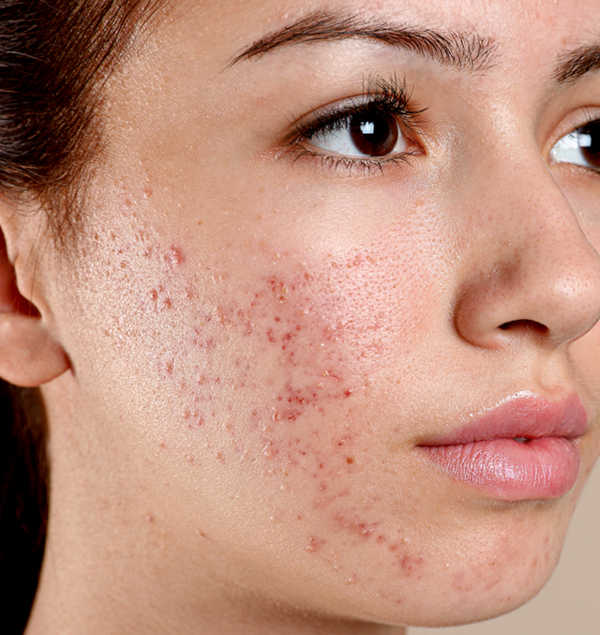

업로드가 완료되었습니다. 다음 단계로 넘어갑니다.


Exception: URL fetch failure on D:	est.png: None -- unknown url type: d

In [53]:
from IPython.display import display
from ipywidgets import FileUpload
from PIL import Image
import io

print("안녕하세요. 얼굴 질병 분석기에 오신 것을 환영합니다.")
print("사진을 입력해주세요")

upload_widget = FileUpload(accept='image/*', multiple=False)

# 다음 단계 함수 정의
def next_step(image):
    # 다음 단계에서 할 작업을 여기에 정의합니다.
    print("업로드가 완료되었습니다. 다음 단계로 넘어갑니다.")
    image_path = tf.keras.utils.get_file('test', origin="D:\test.png")
    # 이미지를 넘파이 배열로 변환
    img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
    )

    print("감사합니다. 최첨단 인공지능 분석을 시작합니다.")
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = facemodel.predict(img_array)

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))

    

# 업로드된 파일 처리 함수
def handle_upload(change):
    # 업로드된 파일 확인
    if change['new']:
        for file_info in change['new'].values():
            # 파일 내용 가져오기
            file_content = file_info['content']
            
            # 이미지를 PIL 객체로 변환
            image = Image.open(io.BytesIO(file_content))
            
            # 이미지 출력
            display(image)
            
            # 다음 단계 함수 호출
            next_step(image)

# 업로드 위젯에 핸들러 연결
upload_widget.observe(handle_upload, names='value')

# 업로드 위젯 표시
display(upload_widget)


